In [64]:
import sys
import random
import copy
import math
from matplotlib import pyplot as plt
INT_MAX = sys.maxsize

In [3]:
n = int(input('Enter the number of jobs : '))
m = int(input('Enter the number of machines : '))
processing_time_matrix = []
ordering_matrix = []

ptm = input('Enter the processing time matrix : ')
om = input('Enter the ordering matrix : ')

#IMPLEMENTING G&T ALGORITHM

ptm = ptm.split(' ')
om = om.split(' ')

k=0
for i in range(0,n):
    temp = []
    for j in range(0,m):
        processing_time = int(ptm[k])
        temp.append(processing_time)
        k=k+1
    processing_time_matrix.append(temp)

k=0
for i in range(0,n):
    temp = []
    for j in range(0,m):
        order = int(om[k])
        temp.append(order)
        k=k+1
    ordering_matrix.append(temp)

print()
print('----- PROCESSING MATRIX -----')
print(processing_time_matrix)

print()
print('----- ODERING MATRIX -----')
print(ordering_matrix)


Enter the number of jobs : 20
Enter the number of machines : 15
Enter the processing time matrix : 25 75 75 76 38 62 38 59 14 13 46 31 57 92 3 67 5 11 11 40 34 77 42 35 96 22 55 21 29 16 22 98 8 35 59 31 13 46 52 22 18 19 64 29 70 99 42 2 35 11 92 88 97 21 56 17 43 27 19 23 50 5 59 71 47 39 82 35 12 2 39 42 52 65 35 48 57 5 2 60 64 86 3 51 26 34 39 45 63 54 40 43 50 71 46 99 67 34 6 95 67 54 29 30 60 59 3 85 6 46 49 5 82 18 71 48 79 62 65 76 65 55 81 15 32 52 97 69 82 89 69 87 22 71 63 70 74 52 94 14 81 24 14 32 39 67 59 18 77 50 18 6 96 53 35 99 39 18 14 90 64 81 89 48 80 44 75 12 13 74 59 71 75 30 93 26 30 84 91 93 39 56 13 29 55 69 26 7 55 48 22 46 50 96 17 57 14 8 13 95 53 78 24 92 90 68 87 43 75 94 93 92 18 28 27 40 56 83 51 15 97 48 53 78 39 47 34 42 28 11 11 30 14 10 4 20 92 19 59 28 69 82 64 40 27 82 27 43 56 17 18 20 98 43 68 84 26 87 61 95 23 88 89 49 84 12 51 3 44 20 43 54 18 72 70 28 20 22 59 36 85 13 73 29 45 7 97 4 22 74 45 62 95 66 14 40 23 79 34 8
Enter the ordering mat

In [246]:
def make_population():
    
    S= []
    curr_time = 0
    
    #STEP 1
    set_A = []
    for i in range(0,n):
        for j in range(0,m):
            if ordering_matrix[i][j] == 1:
                set_A.append([0,i,j])
    
    while len(set_A) != 0:
        #STEP 2
        length_A = len(set_A)
        min_value = INT_MAX
        for i in range(0,length_A):
            a = set_A[i][1]
            b = set_A[i][2]
            processing_time = processing_time_matrix[a][b]
            if set_A[i][0] + processing_time < min_value:
                min_value = set_A[i][0] + processing_time
        #STEP 3
        M = []
        for i in range(0,length_A):
            if set_A[i][0] < min_value:
                M.append(set_A[i][2])
        #STEP 4
        G = []
        set_machines = set(M)
        random_machine = random.randint(0,len(set_machines)-1)
        random_machine = M[random_machine]
        for i in range(0,length_A):
            if set_A[i][2] == random_machine:
                G.append(set_A[i])
            
        #STEP 5
        length_G = len(G)
        max_earlist_time = 0
        element = []
        for i in range(0,length_G):
            if G[i][2] == random_machine:
                earlist_time = 0
                b = random_machine
                a = G[i][1]
                order_number = ordering_matrix[a][b]
                for j in range(0,m):
                    if ordering_matrix[a][j] >= order_number:
                        earlist_time = earlist_time + processing_time_matrix[a][j]
                if earlist_time > max_earlist_time:
                    max_earlist_time = earlist_time
                    element = G[i]
            
        S.append(element[1])
        curr_time = curr_time + processing_time_matrix[element[1]][random_machine]
        next_order_number = ordering_matrix[element[1]][random_machine]+1

        for k in range(0,m):
            if ordering_matrix[element[1]][k] == next_order_number:
                set_A.append([curr_time,element[1],k])
        set_A.remove(element)
        G.remove(element)
    return S

In [247]:
population_size = int(input('Enter the population size : '))
population = []
for i in range(0,population_size):
    population.append(make_population())

Enter the population size : 10


In [248]:
def changeToReal(population):
    n = len(population)
    m = len(population[0])
    for i in range(0,n):
        for j in range(0,m):
            population[i][j] = round(population[i][j] +random.random(),5)
    return population

In [249]:
real_population = changeToReal(population)

In [307]:
number_iterations = int(input('Enter the number of iterations of IPSO : '))

Enter the number of iterations of IPSO : 100


In [308]:
def calculateMakeSpan(schedule):
    job_schedule = []
    machine_free = []
    operation_no = []
    
    for i in range(0,n):
        job_schedule.append(0)
        operation_no.append(0)
    
    for i in range(0,m):
        machine_free.append(0)
    
    timer = 0
    
    while(True):
        flag = True
        
        for s in schedule:
            if s != -1:
                flag = False
       
        if flag == True:
            break
        
        for i in range(0,len(schedule)):
            s = int(schedule[i])
            if s != -1:
                if timer > job_schedule[s]:
                    machine = int(findMachine(s,operation_no[s]+1))
                    if timer > machine_free[machine]:
                        machine_free[machine] = timer + processing_time_matrix[s][machine]
                        job_schedule[s] = timer + processing_time_matrix[s][machine]
                        schedule[i] = -1
                        operation_no[s] = operation_no[s]+1
        timer = timer+1
        
    makespan = 0
    for i in job_schedule:
        if i > makespan:
            makespan = i
    return makespan

def findMachine(s,on):
    for j in range(0,m):
        if ordering_matrix[s][j] == on:
            return j
    return 1    

In [252]:
def isValid(schedule):
    jobs = []
    for i in range(0,n):
        jobs.append(0)
    
    for s in schedule:
        temp = int(s)
        jobs[temp] = jobs[temp]+1
    for i in range(0,n):
        if jobs[i] != m:
            print(jobs)
            return False
    return True

In [326]:
#START To IMPLEMENT IPSO
p_best_span = []
p_best = population[:]
R = []
g_best_span = INT_MAX
g_best =[]
for p in population:
    make_span = calculateMakeSpan(p[:])
    p_best_span.append(make_span)
    if make_span < g_best_span:
        g_best_span = make_span
        g_best = p[:]
    R.append(findR(p[:],g_best[:]))
print(p_best_span)
print(g_best_span)
print(g_best)

[1733, 1720, 1760, 1688, 1844, 1724, 1730, 1720, 1654, 1684]
1654
[3.50728, 7.64429, 13.27283, 6.19904, 11.80317, 9.57272, 11.54526, 5.56591, 10.61631, 2.89351, 0.72124, 17.89757, 19.55123, 7.85094, 2.65837, 8.56951, 18.88389, 13.26705, 11.24809, 8.56047, 1.83164, 14.82893, 9.00485, 15.13893, 16.87224, 12.87394, 4.49017, 10.70532, 6.60827, 7.91844, 3.09555, 4.90569, 5.62213, 17.45302, 0.74894, 6.31571, 2.76982, 19.73492, 11.41308, 18.84507, 13.9299, 0.92203, 1.29607, 8.23301, 14.40506, 9.02247, 6.54435, 1.67627, 15.89868, 16.05841, 8.33631, 12.85629, 10.55919, 3.14552, 11.0593, 14.92022, 7.53882, 4.63258, 5.67714, 17.29919, 13.16044, 18.03362, 2.80669, 19.01361, 10.31839, 8.76241, 14.86108, 0.10943, 9.09083, 6.19492, 1.55888, 11.29515, 15.87854, 16.90219, 12.91669, 3.18327, 13.31007, 7.10943, 16.32218, 6.1602, 4.86606, 5.55288, 17.57675, 18.92794, 12.04998, 6.62603, 19.71927, 4.53911, 2.90405, 13.96893, 10.36196, 8.26908, 0.05943, 14.63432, 9.13596, 1.20612, 11.92706, 17.46931, 16.1356

In [327]:
def findR(p_best,g_best):
    rand1 = round(random.random(),5)
    rand2 = round(random.random(),5)
    c1 = c2 = 0.00005
    alpha = 0.00005
    temp = []
    for i in range(0,len(p_best)):
        a = ((1-alpha)*c1*rand1*p_best[i]+alpha*c2*rand2*g_best[i])/((1-alpha)*c1*rand1+alpha*c2*rand2)
        temp.append(round(a,5))
    return temp

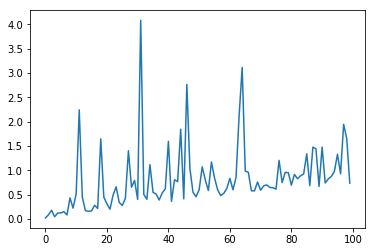

In [328]:
Beta = []
x_axis = []
for i in range(0,number_iterations):
    temp = math.log(1+((i+1)/(number_iterations*random.random())))
    Beta.append(temp)
    x_axis.append(i)
plt.plot(x_axis,Beta)
plt.show()

In [330]:
alpha = 0.5
g_graph_x = []
g_graph_y = []
for i in range(0,number_iterations):
    g_graph_x.append(i)
    g_graph_y.append(g_best_span)
    for k in range(0,len(population)):
        temp = []
        for j in range(0,len(population[k])):
            beta = round(math.log(1+((i+1)/number_iterations*random.random())),5)
            random_number = random.random()
            r = population[k]
            if random_number > 0.5:
                r = p_best[k]
            else:
                k = random.randint(0,len(population)-1)
                r = p_best[k]
            a = R[k][j] + alpha*abs(beta) * (r[j]-population[k][j])
            temp.append(a)
        temp2 = encode(temp)
        if(isValid(temp2)):
            makespan = calculateMakeSpan(temp2)
            if makespan < g_best_span:
                g_best_span = makespan
                g_best = temp
            if makespan < p_best_span[k]:
                p_best_span[k] = makespan
                p_best[k] = temp
        else:
            print('not a valid schedule')
        R[k] = findR(p_best[k][:],g_best[:])

In [283]:
def encode(schedule):
    temp = sorted(schedule)
    encoded = []
    for i in range(0,len(schedule)):
        k = temp.index(schedule[i])
        encoded.append(k+1)
    for i in range(0,len(encoded)):
        encoded[i] = math.ceil((encoded[i]/m)-1)
    return encoded

[1572, 1559, 1587, 1581, 1591, 1557, 1567, 1581, 1584, 1519]
1519
[1684, 1625, 1574, 1574, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1559, 1557, 1557, 1557, 1557, 1557, 1557, 1557, 1557, 1557, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519, 1519]


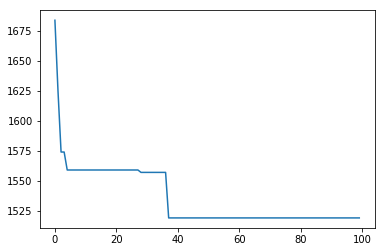

In [331]:
print(p_best_span)
print(g_best_span)
plt.plot(g_graph_x,g_graph_y)
print(g_graph_y)